In [1]:
####################################################################
###    This is the PYTHON version of program 2.4 from page 36 of   #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIR model with a probability of mortality, and	   #
### unequal births and deaths. This code assumes Frequency-        #
### Dependent Transmission        								   #
####################################################################

In [2]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

*rho is the mortality probability. The probability than an infected individual dies from the disease before recovering.

*mu is the per capita death rate from natural causes

*nu is the population level birth rate, we can equate ν/μ with the concept of a carrying capacity

*beta is the transmission rate and incorporates the encounter rate between susceptible and infectious individuals together with the probability of transmission.

*gamma is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infectious period.

*X0 is the initial number or density of susceptible individuals.

*Y0 is the initial number or density of infectious individuals.

*N0 is the initial population size

In [3]:
rho=0.5
nu=mu=1/(70*365.0)
beta=520/365.0
gamma=1/7.0
TS=1.0
ND=1e5
N0=1
X0=0.2
Y0=1e-4
Z0=N0-X0-Y0
INPUT = (X0, Y0, Z0)

In [4]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP    
	Y[0] = mu - beta * V[0] * V[1] / sum(V) - mu * V[0]
	Y[1] = beta * V[0] * V[1] / sum(V) - (gamma + mu) * V[1]/(1-rho)
	Y[2] = gamma * V[1] - mu * V[2]
	return Y   # For odeint

In [5]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

print(RES)

[[2.00000000e-01 1.00000000e-04 7.99900000e-01]
 [2.00002830e-01 9.99143360e-05 7.99882973e-01]
 [2.00005683e-01 9.98295555e-05 7.99865934e-01]
 ...
 [1.13264327e-01 1.21671681e-04 4.51232046e-01]
 [1.13264260e-01 1.21671517e-04 4.51231767e-01]
 [1.13264193e-01 1.21671354e-04 4.51231488e-01]]


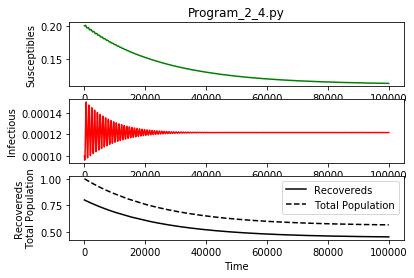

In [6]:
#Ploting
pl.subplot(311)
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.title('Program_2_4.py')
pl.xlabel('Time')
pl.ylabel('Susceptibles')
pl.subplot(312)
pl.plot(RES[:,1], '-r', label='Infectious')
pl.xlabel('Time')
pl.ylabel('Infectious')
pl.subplot(313)
pl.plot(RES[:,2], '-k', label='Recovereds')
pl.plot(sum((RES[:,0],RES[:,1],RES[:,2])), '--k', label='Total Population')
pl.xlabel('Time')
pl.legend(loc=0)
pl.ylabel('Recovereds\nTotal Population')
pl.show()